In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [102]:
#training data; header not given with the data
x_train = pd.read_csv('./Data/x_train.csv',header=None)
y_train = pd.read_csv('./Data/y_train.csv',header=None)
y_train = y_train.values
#print(y_train.shape)
#print(type(y_train))
#test data (given)

#x_test = pd.read_csv('./Data/x_test.csv',header=None)

In [103]:
n,p=x_train.shape 
#n=total number of samples in test_dataset, p=total features in test_dataset

In [104]:
x_train.describe()
#need to scaling  the data

#x_train.hist(bins=50,figsize=(20,15))
#plt.show()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,88.107229,-0.000325,0.000733,0.000223,0.001102,0.001053,-0.001961,-0.002974,-0.001258,-0.001981,...,-0.001156,0.000214,-0.000388,0.000540,-0.000626,-0.000246,-0.000637,0.000731,0.000324,-0.000447
std,246.550339,1.653965,0.758565,2.834900,1.194541,1.020710,1.219846,1.364943,1.098848,1.089522,...,0.764275,0.731158,0.725724,0.614013,0.605811,0.520870,0.481813,0.397487,0.331225,1.961390
min,0.000000,-72.715700,-16.840500,-11.201200,-73.216700,-4.797470,-43.557200,-42.147900,-13.434100,-24.588300,...,-28.009600,-34.830400,-10.933100,-36.666000,-2.836630,-8.696630,-2.604550,-22.565700,-11.710900,-56.407500
25%,5.530000,-0.598588,-0.442734,-1.699698,-0.208243,-0.759802,-0.554699,-0.692803,-0.645753,-0.536353,...,-0.211575,-0.228921,-0.542505,-0.161675,-0.355449,-0.317469,-0.327347,-0.070546,-0.052710,-0.918478
50%,22.000000,0.064438,0.091204,-0.039276,0.023027,-0.030860,0.039095,-0.056544,-0.051372,-0.092488,...,-0.062841,-0.029841,0.005979,-0.011135,0.040865,0.017086,-0.051639,0.001486,0.011407,0.017934
75%,77.100000,0.802432,0.513616,1.488645,0.325863,0.739740,0.568374,0.609846,0.596433,0.453088,...,0.132692,0.186201,0.528508,0.147486,0.438098,0.351219,0.240137,0.091324,0.078274,1.315400
max,19656.500000,22.057700,4.691280,33.750700,20.007200,12.018900,44.054500,34.801700,15.595000,23.745100,...,39.420900,27.202800,10.503100,19.002900,4.016340,7.519590,3.517350,12.152400,33.847800,2.454930


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(x_train)
#dtrain=pd.DataFrame(data=xtrain)
#dtrain.describe()
#dtrain.hist(bins=50,figsize=(20,15))
#plt.show()

In [106]:
# Own version of 5-fold CV
sample_num=np.arange(n)
np.random.shuffle(sample_num) # Randomly shuffle training cases to make 5-fold CV sets
xcv=np.array_split(sample_num,5) #five cross-validation set


In [108]:
# Train KNN classifier with 3, 5, 10, 20 and 25 number of neighbors and reprot F1-score

from sklearn.neighbors import KNeighborsClassifier

nneigh=np.array([3,5,10,20,25]) 
scoresF=np.empty(len(nneigh))

# Run knn five-fold times
for j in range(len(nneigh)):
    scoresf=0
    for i in range(5):  # Repeat experiment 5 times (k-fold CV times)
        #pick cv set from sample
        x_for_cv=xtrain[xcv[i]]
        y_for_cv=y_train[xcv[i]]
        #exclude cv set from sample for trainging
        x_for_train=np.delete(xtrain,xcv[i],0) 
        y_for_train=np.delete(y_train,xcv[i],0)
        # do knn classificationexit()
        knn=KNeighborsClassifier(n_neighbors=nneigh[j])
        knn.fit(x_for_train,y_for_train)
        y_prediction = knn.predict(x_for_cv)
        fscore1=f1_score(y_for_cv,y_prediction)
        scoresf=scoresf+fscore1
        #print('fscore sklearn=',fscore1)
    scoresF[j]=scoresf/5 #Five-fold CV
#print("avg from sklearn",scoresF)

C:\Users\akashjn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\akashjn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\akashjn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\akashjn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\akashjn\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning

<class 'tuple'>


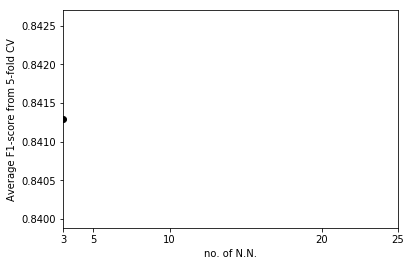

In [109]:
print(type(y_train.shape))
plt.plot(nneigh,scoresF,color="black",linewidth=1)
plt.scatter(nneigh,scoresF,color="black")
plt.xticks((3, 5, 10, 20, 25))
plt.xlabel("no. of N.N.")
plt.ylabel("Average F1-score from 5-fold CV")
plt.show()